# Creditcard Fraud detection using Machine learningntation

## 1. Problem definition 

> Given data about creditcard application can we can we classify fauduland application or not ? 

## 2. Data

data  source :- https://www.kaggle.com/datasets/mishra5001/credit-card

## 3. Evaluation

> If we can predict with 93% accuracy whether a application is fraud or not, we can call the model a ssuccess

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).



## preparing tools 
we are using pandas, Numpy, Matplotlib for data and manipulation 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# import the sklearn models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#>> 100k sampples
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

# Evaluation models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### load data

In [17]:
application_data = pd.read_csv("dataset/application_data.csv")
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
application_data["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

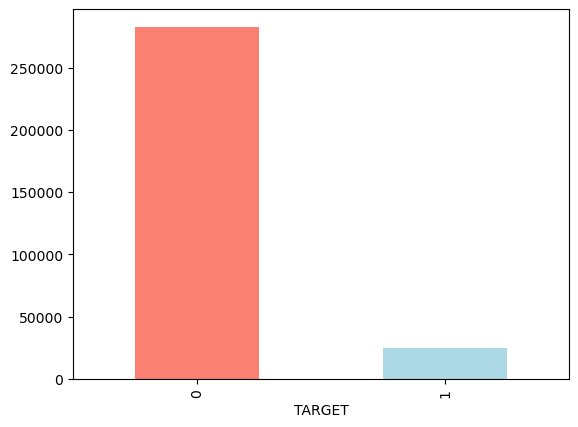

In [19]:
 plt = application_data["TARGET"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [20]:
previous_application = pd.read_csv("dataset/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
column_desc =  pd.read_csv("dataset/columns_description.csv" , encoding='latin-1')
column_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [22]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [23]:
print("Object type values:",np.count_nonzero(application_data.select_dtypes('object').columns))

Object type values: 16


In [24]:
print(application_data.select_dtypes('object').columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [25]:
application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [26]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [27]:
subset1 = application_data.iloc[:, 0:20]
subset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [28]:
draft1 = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
         'REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION',
         'DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
         'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']

In [29]:
draft1transform = ['NAME_CONTRACT_TYPE',  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',]

In [30]:
draft1missing = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',]

In [31]:
# lets handle the missing data of object datatype

misssing = ['NAME_TYPE_SUITE','OCCUPATION_TYPE' ]

In [32]:
application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].fillna(value="Other_B")

In [33]:
application_data['NAME_TYPE_SUITE'].isna().sum()

0

In [34]:
application_data['OCCUPATION_TYPE'].isna().sum()

96391

In [35]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna(value="Unknown")

In [36]:
application_data['OCCUPATION_TYPE'].isna().sum()

0

In [37]:
application_data.shape

(307511, 122)

In [38]:
import numpy as np

# Add an empty column 'I'
application_data['I'] = np.nan

print(application_data)


        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [39]:
np.random.seed(66)
randomarr = np.random.uniform(low=0.1, high=0.4, size=(24825, 1))
randomarr

array([[0.14628627],
       [0.14010987],
       [0.20880564],
       ...,
       [0.39547265],
       [0.2945186 ],
       [0.38937404]])

In [40]:
newcol = pd.DataFrame(randomarr)
newcol

,0
0,0.146286
1,0.140110
2,0.208806
3,0.303733
4,0.158335
...,...
24820,0.131051
24821,0.371326
24822,0.395473
24823,0.294519


In [41]:
target_one_indices = application_data[application_data['TARGET'] == 1].index

In [42]:
assert len(newcol) == len(target_one_indices), "Mismatch in row counts between df2 and target == 1 rows in df1."


In [43]:
application_data.loc[target_one_indices, 'I'] = newcol.values
print(application_data)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [44]:
np.random.seed(67)
randomarr2 = np.random.uniform(low=0.38, high=0.999, size=(282686, 1))


newcol2 = pd.DataFrame(randomarr2)
newcol2

,0
0,0.717882
1,0.911632
2,0.804568
3,0.585255
4,0.417139
...,...
282681,0.897500
282682,0.714499
282683,0.861775
282684,0.876234


In [45]:
target_zero_indices = application_data[application_data['TARGET'] == 0].index

In [46]:
assert len(newcol2) == len(target_zero_indices), "Mismatch in row counts between df2 and target == 0 rows in df1."

In [47]:
application_data.loc[target_zero_indices, 'I'] = newcol2.values
print(application_data)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [48]:
application_data['I'].isna().sum()

0

In [49]:
## lets convert the data into x and y 

x = application_data.drop('TARGET', axis = 1)
y= application_data['TARGET']

x.shape

(307511, 122)

In [50]:
x = x.drop('SK_ID_CURR', axis = 1)
x = x.drop('CODE_GENDER', axis = 1)
x = x.drop('HOUR_APPR_PROCESS_START', axis = 1)
x = x.drop('WEEKDAY_APPR_PROCESS_START', axis = 1)

In [51]:
x['EXT_SOURCE_1'].isna().sum() # drop it 2 and 3 also cause they dont have meaning

173378

In [52]:
drop_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [53]:
len(drop_columns)

50

In [54]:
for i in drop_columns:
    x = x.drop(i, axis = 1)
x.shape    

(307511, 68)

In [55]:
missingmean = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in missingmean:
    x[i] = x[i].fillna(value = x[i].mean())
x.isna().sum()    

NAME_CONTRACT_TYPE            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
I                             0
Length: 68, dtype: int64

In [56]:
x = x.drop('OWN_CAR_AGE', axis=1)

In [57]:
x.shape

(307511, 67)

In [58]:
ss1= x.iloc[:,0:30]
ss1.isna().sum()

NAME_CONTRACT_TYPE               0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
REG_REGION_NOT_LIVE_

In [59]:
ss2= x.iloc[:,29:68]
ss2.isna().sum()

REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18            

In [60]:
fillmiscol = ['AMT_ANNUITY','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

In [61]:
for j in fillmiscol:
    print(x[j].dtype)

float64
float64
float64
float64
float64
float64
float64


In [62]:
x['AMT_ANNUITY'].mean()

27108.573909183444

In [63]:
x['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [64]:
x['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [65]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean()

1.4052921791901856

In [66]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788705

In [67]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [68]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533851

In [69]:
x['CNT_FAM_MEMBERS'] = x['CNT_FAM_MEMBERS'].fillna(value = 2.0)

In [70]:
x['DAYS_LAST_PHONE_CHANGE'] = x['DAYS_LAST_PHONE_CHANGE'].fillna(value= -1285.0)
x['OBS_30_CNT_SOCIAL_CIRCLE'] = x['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=1.0)
x['DEF_30_CNT_SOCIAL_CIRCLE'] = x['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=0.0)
x['OBS_60_CNT_SOCIAL_CIRCLE'] = x['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=1.0)
x['DEF_60_CNT_SOCIAL_CIRCLE'] = x['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=0.0)

In [71]:
x['AMT_ANNUITY'] = x['AMT_ANNUITY'].fillna(value =27108.573 )
x['AMT_GOODS_PRICE'] = x['AMT_GOODS_PRICE'].fillna(value = 538396.20)

In [72]:
ss1= x.iloc[:,0:30]
ss1.isna().sum()

NAME_CONTRACT_TYPE             0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
dtype: int

In [73]:
ss2= x.iloc[:,29:68]
ss2.isna().sum()

REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUM

## now we have to convert the object type into float or int 

 we have two ways of doing it 
  * using pandas
  * using Scikit learn

let's try both

**using pandas**

In [74]:
draft1transform

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [75]:
dummies = pd.get_dummies(data=application_data[draft1transform],
                         dtype=float)
dummies

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
xp = x

In [77]:
for i in draft1transform:
    xp = xp.drop(i, axis = 1)
xp.shape   

(307511, 57)

In [78]:
## add both the DataFrame dummies and cp 
merged_df = pd.concat([xp, dummies], axis=1)
merged_df

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
merged_df.shape

(307511, 172)

In [80]:
dummies.shape

(307511, 115)

In [81]:
y


0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [82]:
# we have x and y now lets split into train and test

np.random.seed(47)

# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(merged_df,
                                                    y,
                                                    test_size=0.2)



In [83]:
X_train.shape

(246008, 172)

In [84]:
y_train.shape

(246008,)

In [85]:
X_test.shape

(61503, 172)

In [86]:
y_test.shape

(61503,)

In [87]:
models = { "Random Forest": RandomForestClassifier(),
          "SGD": SGDClassifier() }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [88]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Random Forest': 0.9947482236638863, 'SGD': 0.9144431978927857}

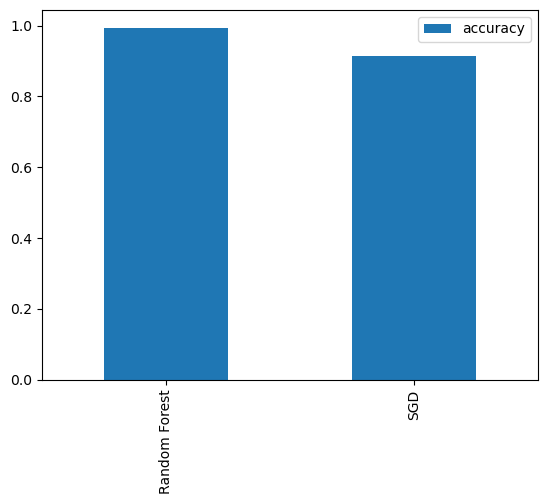

In [89]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [90]:
mod2 =  RandomForestClassifier()
mod3 =  SGDClassifier()

mod2.fit(X_train, y_train) 
mod3.fit(X_train, y_train)

ypred2  = mod2.predict(X_test)
ypred3  = mod3.predict(X_test)

In [ ]:
# from sklearn import svm
# clf1 = svm.SVC()

# clf1.fit(X_train, y_train)

# y_preds = clf1.predict(X_test)


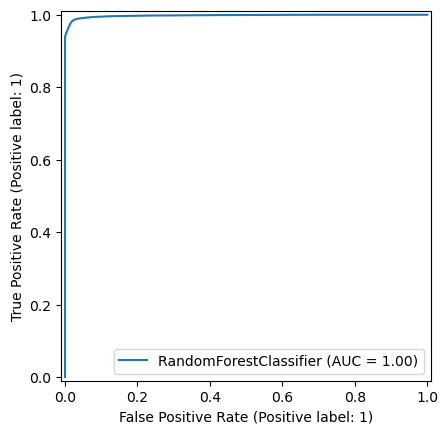

In [91]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=mod2, 
                               X=X_test, 
                               y=y_test); 

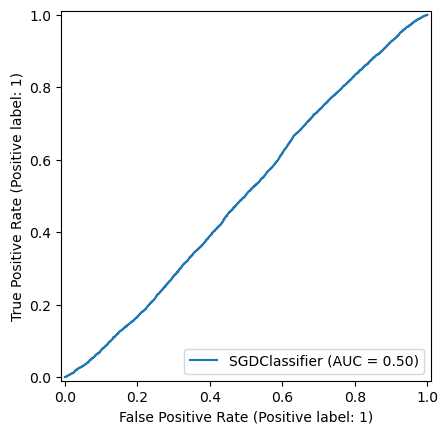

In [92]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=mod3, 
                               X=X_test, 
                               y=y_test); 

In [93]:
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56474
           1       1.00      0.94      0.97      5029

    accuracy                           0.99     61503
   macro avg       1.00      0.97      0.98     61503
weighted avg       0.99      0.99      0.99     61503



In [94]:
print(classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.95      0.00      0.01     56474
           1       0.08      1.00      0.15      5029

    accuracy                           0.08     61503
   macro avg       0.52      0.50      0.08     61503
weighted avg       0.88      0.08      0.02     61503



In [95]:
cv1_precision = np.mean(cross_val_score(mod2,
                                       merged_df,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv1_precision

0.9999569429494081

In [96]:
cv1_recall = np.mean(cross_val_score(mod2,
                                    merged_df,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv1_recall

0.9338569989929507

In [97]:
cv1_f1 = np.mean(cross_val_score(mod2,
                                merged_df,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv1_f1

0.9657553730832005

In [98]:
cv1_acc = np.mean(cross_val_score(mod2,
                                merged_df,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="accuracy")) # f1 as scoring
cv1_acc

0.9946571016652246

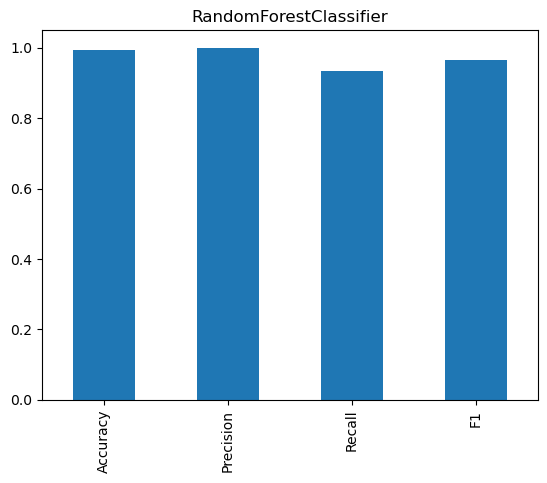

In [99]:
cv_metrics = pd.DataFrame({"Accuracy": cv1_acc,
                            "Precision": cv1_precision,
                            "Recall": cv1_recall,
                            "F1": cv1_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="RandomForestClassifier", legend=False);

In [90]:
# Use feature_importances_ instead of coef_
features_dict1 = dict(zip(merged_df.columns, mod2.feature_importances_))
features_dict1


{'CNT_CHILDREN': 0.012233433073046187,
 'AMT_INCOME_TOTAL': 0.04498588395350363,
 'AMT_CREDIT': 0.05063485614930878,
 'AMT_ANNUITY': 0.05427300284338472,
 'AMT_GOODS_PRICE': 0.043008071138336594,
 'REGION_POPULATION_RELATIVE': 0.04468172017158268,
 'DAYS_BIRTH': 0.06069835791755069,
 'DAYS_EMPLOYED': 0.05101765022096009,
 'DAYS_REGISTRATION': 0.05875671387126688,
 'DAYS_ID_PUBLISH': 0.059118511444991875,
 'FLAG_MOBIL': 0.0,
 'FLAG_EMP_PHONE': 0.0008849277717005399,
 'FLAG_WORK_PHONE': 0.008054971905822364,
 'FLAG_CONT_MOBILE': 0.0003887164342869688,
 'FLAG_PHONE': 0.008849426151722337,
 'FLAG_EMAIL': 0.004306273130902784,
 'CNT_FAM_MEMBERS': 0.016670815964259636,
 'REGION_RATING_CLIENT': 0.006980306487104736,
 'REGION_RATING_CLIENT_W_CITY': 0.007088604936738688,
 'REG_REGION_NOT_LIVE_REGION': 0.0014043986920968222,
 'REG_REGION_NOT_WORK_REGION': 0.0028798881808058314,
 'LIVE_REGION_NOT_WORK_REGION': 0.0025766643121860762,
 'REG_CITY_NOT_LIVE_CITY': 0.004907423901335012,
 'REG_CITY_NOT_

In [96]:
import matplotlib.pyplot as plt

# Sort the features by importance
sorted_features = sorted(features_dict1.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted features into two lists: feature names and their importance
features, importances = zip(*sorted_features)

# Plot the feature importances
plt.figure(figsize=(180, 90))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()


In [70]:
# my_dict = {'feature1': 1.2345, 'feature2': 5.6789, 'feature3': 9.1234}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(features_dict.items()), columns=['Name', 'Value'])

# Round the 'Value' column to 2 decimal places
df['Value'] = df['Value'].round(6)

# Convert back to dictionary (optional)
rounded_dict = dict(df.values)

print(rounded_dict)

{'CNT_CHILDREN': 0.012233, 'AMT_INCOME_TOTAL': 0.044986, 'AMT_CREDIT': 0.050635, 'AMT_ANNUITY': 0.054273, 'AMT_GOODS_PRICE': 0.043008, 'REGION_POPULATION_RELATIVE': 0.044682, 'DAYS_BIRTH': 0.060698, 'DAYS_EMPLOYED': 0.051018, 'DAYS_REGISTRATION': 0.058757, 'DAYS_ID_PUBLISH': 0.059119, 'FLAG_MOBIL': 0.0, 'FLAG_EMP_PHONE': 0.000885, 'FLAG_WORK_PHONE': 0.008055, 'FLAG_CONT_MOBILE': 0.000389, 'FLAG_PHONE': 0.008849, 'FLAG_EMAIL': 0.004306, 'CNT_FAM_MEMBERS': 0.016671, 'REGION_RATING_CLIENT': 0.00698, 'REGION_RATING_CLIENT_W_CITY': 0.007089, 'REG_REGION_NOT_LIVE_REGION': 0.001404, 'REG_REGION_NOT_WORK_REGION': 0.00288, 'LIVE_REGION_NOT_WORK_REGION': 0.002577, 'REG_CITY_NOT_LIVE_CITY': 0.004907, 'REG_CITY_NOT_WORK_CITY': 0.005968, 'LIVE_CITY_NOT_WORK_CITY': 0.005779, 'OBS_30_CNT_SOCIAL_CIRCLE': 0.021962, 'DEF_30_CNT_SOCIAL_CIRCLE': 0.007701, 'OBS_60_CNT_SOCIAL_CIRCLE': 0.021569, 'DEF_60_CNT_SOCIAL_CIRCLE': 0.00621, 'DAYS_LAST_PHONE_CHANGE': 0.053303, 'FLAG_DOCUMENT_2': 4.2e-05, 'FLAG_DOCUMEN

In [73]:
newcolumns = [
 'DAYS_BIRTH', 
 'DAYS_ID_PUBLISH', 
 'DAYS_REGISTRATION', 
 'DAYS_LAST_PHONE_CHANGE', 
 'AMT_CREDIT', 
 'AMT_ANNUITY', 
 'DAYS_EMPLOYED', 
 'AMT_INCOME_TOTAL', 
 'AMT_GOODS_PRICE', 
 'DAYS_EMPLOYED', 
 'CNT_CHILDREN', 
 'AMT_REQ_CREDIT_BUREAU_MON', 
 'AMT_REQ_CREDIT_BUREAU_HOUR', 
 'FLAG_EMAIL', 
 'NAME_FAMILY_STATUS_Married', 
 'NAME_FAMILY_STATUS_Single / not married', 
 'NAME_INCOME_TYPE_Working', 
 'REG_CITY_NOT_LIVE_CITY'
]


In [74]:
newx = merged_df[newcolumns]

In [75]:
newx

,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_CHILDREN,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_EMAIL,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_INCOME_TYPE_Working,REG_CITY_NOT_LIVE_CITY
0,-9461,-2120,-3648.0,-1134.0,406597.5,24700.5,-637,202500.0,351000.0,-637,0,0.000000,0.000000,0,0.0,1.0,1.0,0
1,-16765,-291,-1186.0,-828.0,1293502.5,35698.5,-1188,270000.0,1129500.0,-1188,0,0.000000,0.000000,0,1.0,0.0,0.0,0
2,-19046,-2531,-4260.0,-815.0,135000.0,6750.0,-225,67500.0,135000.0,-225,0,0.000000,0.000000,0,0.0,1.0,1.0,0
3,-19005,-2437,-9833.0,-617.0,312682.5,29686.5,-3039,135000.0,297000.0,-3039,0,0.267395,0.006402,0,0.0,0.0,1.0,0
4,-19932,-3458,-4311.0,-1106.0,513000.0,21865.5,-3038,121500.0,513000.0,-3038,0,0.000000,0.000000,0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-9327,-1982,-8456.0,-273.0,254700.0,27558.0,-236,157500.0,225000.0,-236,0,0.267395,0.006402,0,0.0,0.0,1.0,0
307507,-20775,-4090,-4388.0,0.0,269550.0,12001.5,365243,72000.0,225000.0,365243,0,0.267395,0.006402,0,0.0,0.0,0.0,0
307508,-14966,-5150,-6737.0,-1909.0,677664.0,29979.0,-7921,153000.0,585000.0,-7921,0,1.000000,1.000000,1,0.0,0.0,1.0,0
307509,-11961,-931,-2562.0,-322.0,370107.0,20205.0,-4786,171000.0,319500.0,-4786,0,0.000000,0.000000,0,1.0,0.0,0.0,1


In [76]:
y


0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [78]:
# we have x and y now lets split into train and test

np.random.seed(47)

# Create train and test splits with transformed_X
x_train, x_test, y_train, y_test = train_test_split(newx ,
                                                    y,
                                                    test_size=0.2)



In [79]:
model_scores1 = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores1

{'Random Forest': 0.918264149716274, 'SGD': 0.9181015560216574}

In [81]:
moda =  RandomForestClassifier()
modb =  SGDClassifier()

moda.fit(x_train, y_train) 
modb.fit(x_train, y_train)

ypreda  = moda.predict(x_test)
ypredb  = modb.predict(x_test)

In [83]:
cv1_precision = np.mean(cross_val_score(moda,
                                       newx,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv1_precision

0.5

In [84]:
cv2_precision = np.mean(cross_val_score(modb,
                                       newx,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv2_precision

C:\Users\Sujal\TEproject\CCfrauddetect\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sujal\TEproject\CCfrauddetect\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.02222222222222222

In [85]:
cv1_recall = np.mean(cross_val_score(moda,
                                       newx,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="recall")) # recall as scoring
cv1_recall

0.00028197381671701913

In [86]:
cv2_recall = np.mean(cross_val_score(modb,
                                       newx,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="recall")) # precision as scoring
cv2_recall

0.00036253776435045317

In [87]:
# Use feature_importances_ instead of coef_
features_dict = dict(zip(merged_df.columns, moda.feature_importances_))
features_dict


{'CNT_CHILDREN': 0.11083184817061613,
 'AMT_INCOME_TOTAL': 0.10803513862853839,
 'AMT_CREDIT': 0.10868077848063215,
 'AMT_ANNUITY': 0.0969844587030282,
 'AMT_GOODS_PRICE': 0.08043401069466155,
 'REGION_POPULATION_RELATIVE': 0.09770465155674586,
 'DAYS_BIRTH': 0.08666108358378155,
 'DAYS_EMPLOYED': 0.07255622965425183,
 'DAYS_REGISTRATION': 0.06080652338978209,
 'DAYS_ID_PUBLISH': 0.08600073877852543,
 'FLAG_MOBIL': 0.02094585766187626,
 'FLAG_EMP_PHONE': 0.018887859106288273,
 'FLAG_WORK_PHONE': 0.00954678572847862,
 'FLAG_CONT_MOBILE': 0.006072541135161283,
 'FLAG_PHONE': 0.012618507077770449,
 'FLAG_EMAIL': 0.00946819968428763,
 'CNT_FAM_MEMBERS': 0.006789602189532105,
 'REGION_RATING_CLIENT': 0.006975185776042329}

In [88]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

SyntaxError: invalid non-printable character U+00A0 (3531949551.py, line 3)

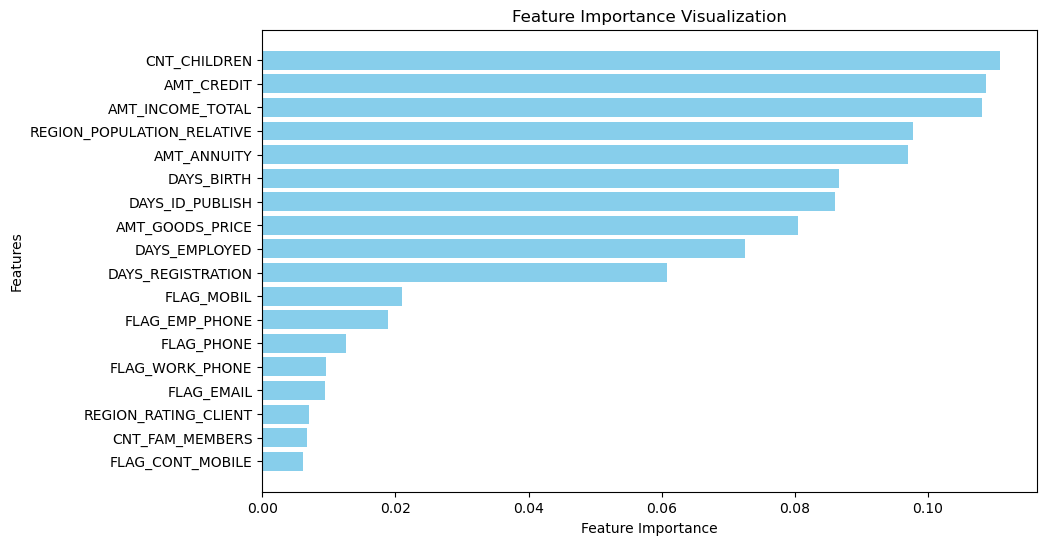

In [89]:
import matplotlib.pyplot as plt

# Sort the features by importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted features into two lists: feature names and their importance
features, importances = zip(*sorted_features)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()
